<a href="https://colab.research.google.com/github/huongnguyen2024/First-Linear-Regression-Model/blob/main/Project_2_MIS_515.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Group #9 Team members:**
#### Naf Huma
#### Mohamed Mohamed
#### Huong Nguyen

# **Topic:** Year 1990 California House Price Prediction Model

# Part 1: Import and Clean Dataset

Link to dataset [California Housing Prices_1990 CA Census](https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import os
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
file_path = '/content/drive/My Drive/MIS515MachineLearningProject/California_Houses.csv'

# Step 2: Check if file exists then read the CSV file
try:
  with open(file_path, 'r') as file:
    print('File opened successfully!')

    # Load the file into a DataFrame
    df = pd.read_csv(file_path)

    # Display the DataFrame info
    print(df.info())

except FileNotFoundError:
  print('File not found.')

except Exception as e:
  print(f'An error occurred: {e}')

File opened successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non

In [ ]:
df.describe()

Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000      1.000000     32.540000   -124.350000   
25%      295.000000    787.000000    280.000000     33.930000   -121.800000   
50%      435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%      647.000000   1725.000000    605.000000     37.710000   -118.010000   
max     6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

       Distance_to_coast  Distance_to_LA  Distance_to_SanDiego  \
count       20640.000000    2.064000e+04          2.064000e+04   
mean        40509.264883    2.694220e+05          3.981649e+05   
std         49140.039160    2.477324e+05          2.894006e+05   
min           120.676447    4.205891e+02          4.849180e+02   
25%          9079.756762    3.211125e+04          1.594264e+05   
50%         20522.019101    1.736675e+05          2.147398e+05   
75%         49830.414479    5.271562e+05          7.057954e+05   
max        333804.686371    1.018260e+06          1.196919e+06   

       Distance_to_SanJose  Distance_to_SanFrancisco  
count         20640.000000              20640.000000  
mean         349187.551219             386688.422291  
std          217149.875026             250122.192316  
min             569.448118                456.141313  
25%          113119.928682             117395.477505  
50%          459758.877000             526546.661701  
75%          516946.490963             584552.007907  
max          836762.678210             903627.663298

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.any():
  print("There are missing values in the dataset.")
else:
  print("There are no missing values in the dataset.")

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64
There are no missing values in the dataset.


In [ ]:
# Description of each column
df['Median_House_Value'].description = "Median House Value for a household within a block"
df['Median_Income'].description = "Median Income for a household within a block in $10k unit"
df['Median_Age'].description = "Median Age of a house within a block, a lower number is a newer house"
df['Households'].description = "Total number of households within a block"
df['Tot_Rooms'].description = "Total number of rooms within a block"
df['Tot_Bedrooms'].description = "Total number of bedrooms within a block"
df['Population'].description = "Total number of people residing within a block"
df['Latitude'].description = "How far north a house is, a higher value is farther north [°]"
df['Longitude'].description = "How far west a house is, a higher value is farther west [°]"
df['Distance_to_coast'].description = 'Distance to the nearest coast point [m]'
df['Distance_to_LA'].description = 'Distance to the centre of Los Angeles [m]'
df['Distance_to_SanDiego'].description = 'Distance to the centre of San Diego [m]'
df['Distance_to_SanJose'].description = 'Distance to the centre of San Jose [m]'
df['Distance_to_SanFrancisco'].description = 'Distance to the centre of San Francisco [m]'


In [ ]:
# Data is cleaned and ready for use
df.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   556529.158342         735501.806984         67432.517001   
1   554279.850069         733236.884360         65049.908574   
2   554610.717069         733525.682937         64867.289833   
3   555194.266086         734095.290744         65287.138412   
4   555194.266086         734095.290744         65287.138412   

   Distance_to_SanFrancisco  
0              21250.213767  
1              20880.600400  
2              18811.487450  
3              18031.047568  
4              18031.047568

# Part 2: Data Visualization (EDA)

In [ ]:
'''This code box is for running purpose, please ignore
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print("The dataset file was not found. Please check the file path.")'''

'This code box is for running purpose, please ignore\ntry:\n    df = pd.read_csv(file_path)\n    print("Dataset loaded successfully!")\n    print(df.head())\nexcept FileNotFoundError:\n    print("The dataset file was not found. Please check the file path.")'

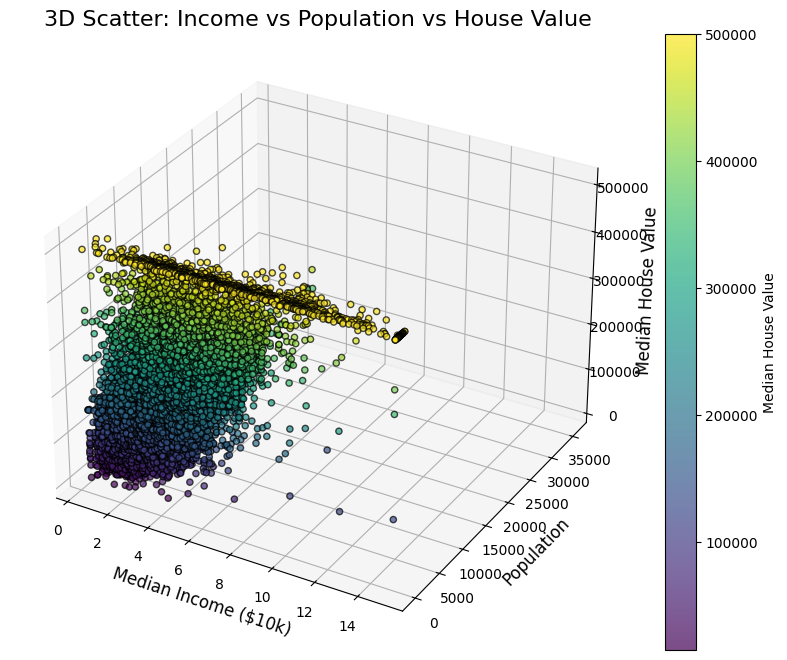

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D scatter
sc = ax.scatter(df['Median_Income'], df['Population'], df['Median_House_Value'],
                c=df['Median_House_Value'], cmap='viridis', alpha=0.7, edgecolor='k')

# Customize plot
ax.set_title('3D Scatter: Income vs Population vs House Value', fontsize=16)
ax.set_xlabel('Median Income ($10k)', fontsize=12)
ax.set_ylabel('Population', fontsize=12)
ax.set_zlabel('Median House Value', fontsize=12)
fig.colorbar(sc, label='Median House Value')
plt.show()


<ipython-input-48-8a49ab22f033>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  population_by_coast = df.groupby('Distance_to_Coast_Bins')['Population'].sum()


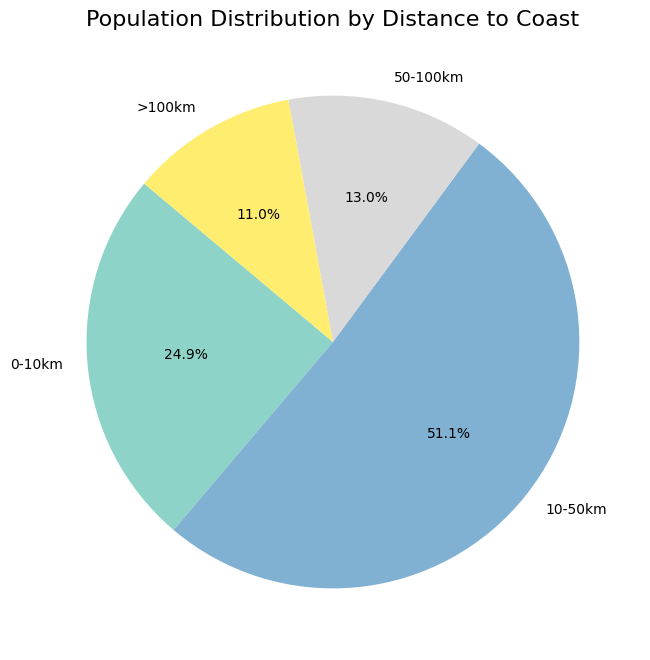

In [ ]:
# Bin distances to coast
df['Distance_to_Coast_Bins'] = pd.cut(df['Distance_to_coast'], bins=[0, 10000, 50000, 100000, float('inf')],
                                      labels=['0-10km', '10-50km', '50-100km', '>100km'])

# Aggregate population by distance bins
population_by_coast = df.groupby('Distance_to_Coast_Bins')['Population'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
population_by_coast.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Population Distribution by Distance to Coast', fontsize=16)
plt.ylabel('')  # Remove y-axis label
plt.show()


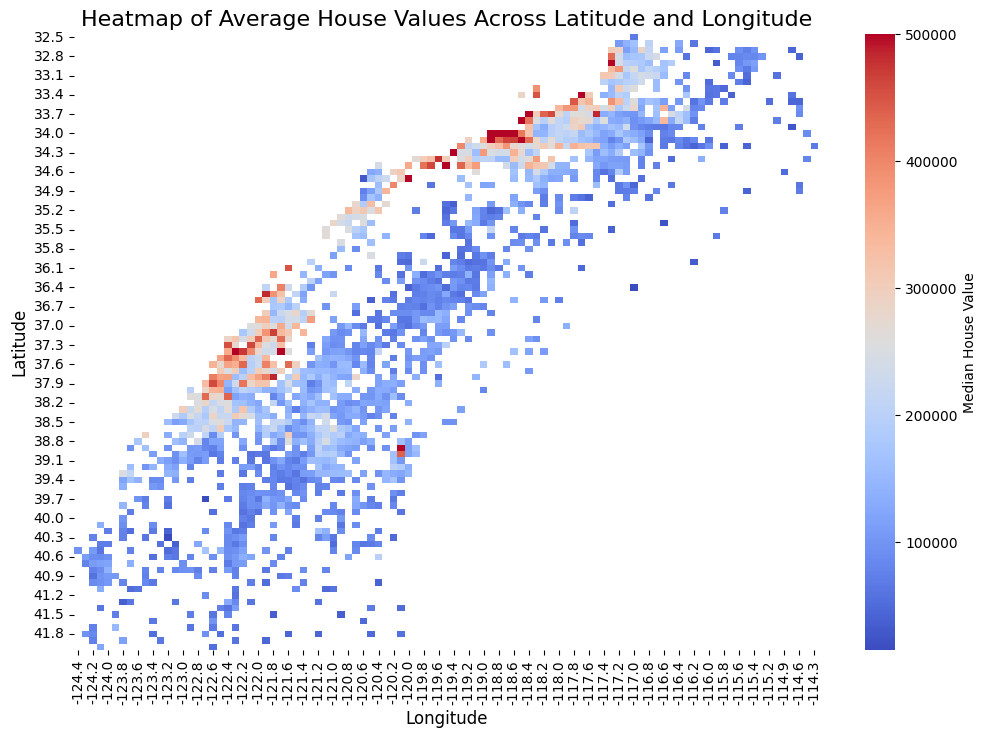

In [ ]:
# Round latitude and longitude to create bins
df['Lat_bin'] = df['Latitude'].round(1)
df['Lon_bin'] = df['Longitude'].round(1)

# Group by bins and calculate mean house value
heatmap_data = df.groupby(['Lat_bin', 'Lon_bin'])['Median_House_Value'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Median House Value'})
plt.title('Heatmap of Average House Values Across Latitude and Longitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()


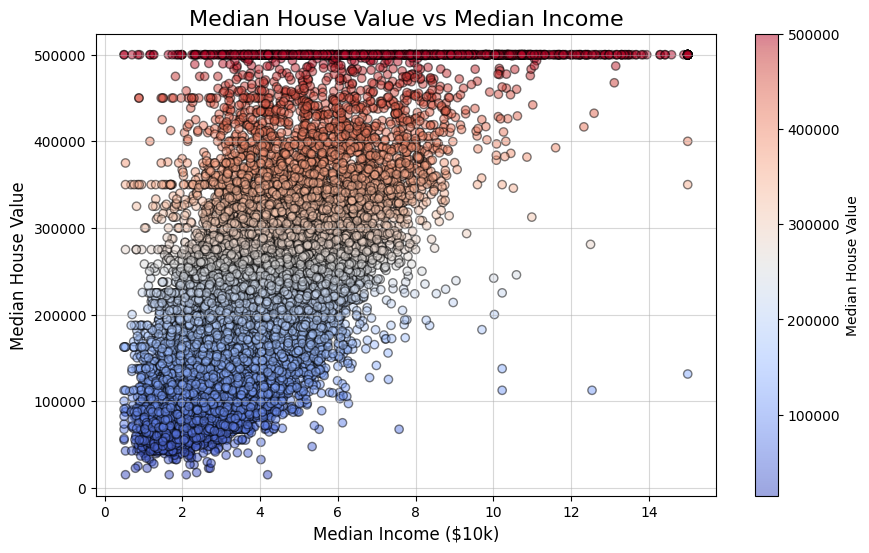

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Median_Income'], df['Median_House_Value'], alpha=0.5, c=df['Median_House_Value'], cmap='coolwarm', edgecolor='k')
plt.colorbar(label='Median House Value')
plt.title('Median House Value vs Median Income', fontsize=16)
plt.xlabel('Median Income ($10k)', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)
plt.grid(alpha=0.5)
plt.show()


In [ ]:
# Dropping add columns to regain the original df
df.drop(['Lat_bin', 'Lon_bin', 'Distance_to_Coast_Bins'], axis=1, inplace=True)

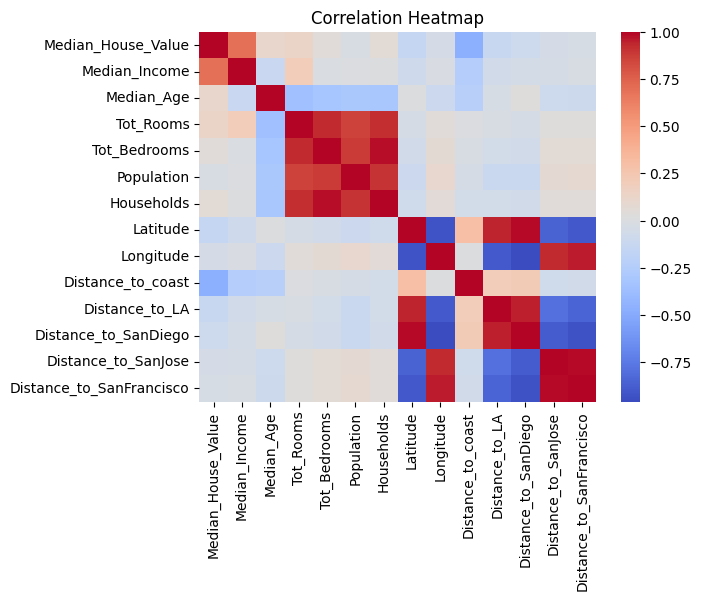

In [ ]:
# Heatmap plotting to visualize the correlations among attributes
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
subset_df = df[['Median_House_Value', 'Median_Income', 'Distance_to_coast',
                'Latitude', 'Longitude',
                'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose',
                'Distance_to_SanFrancisco']]

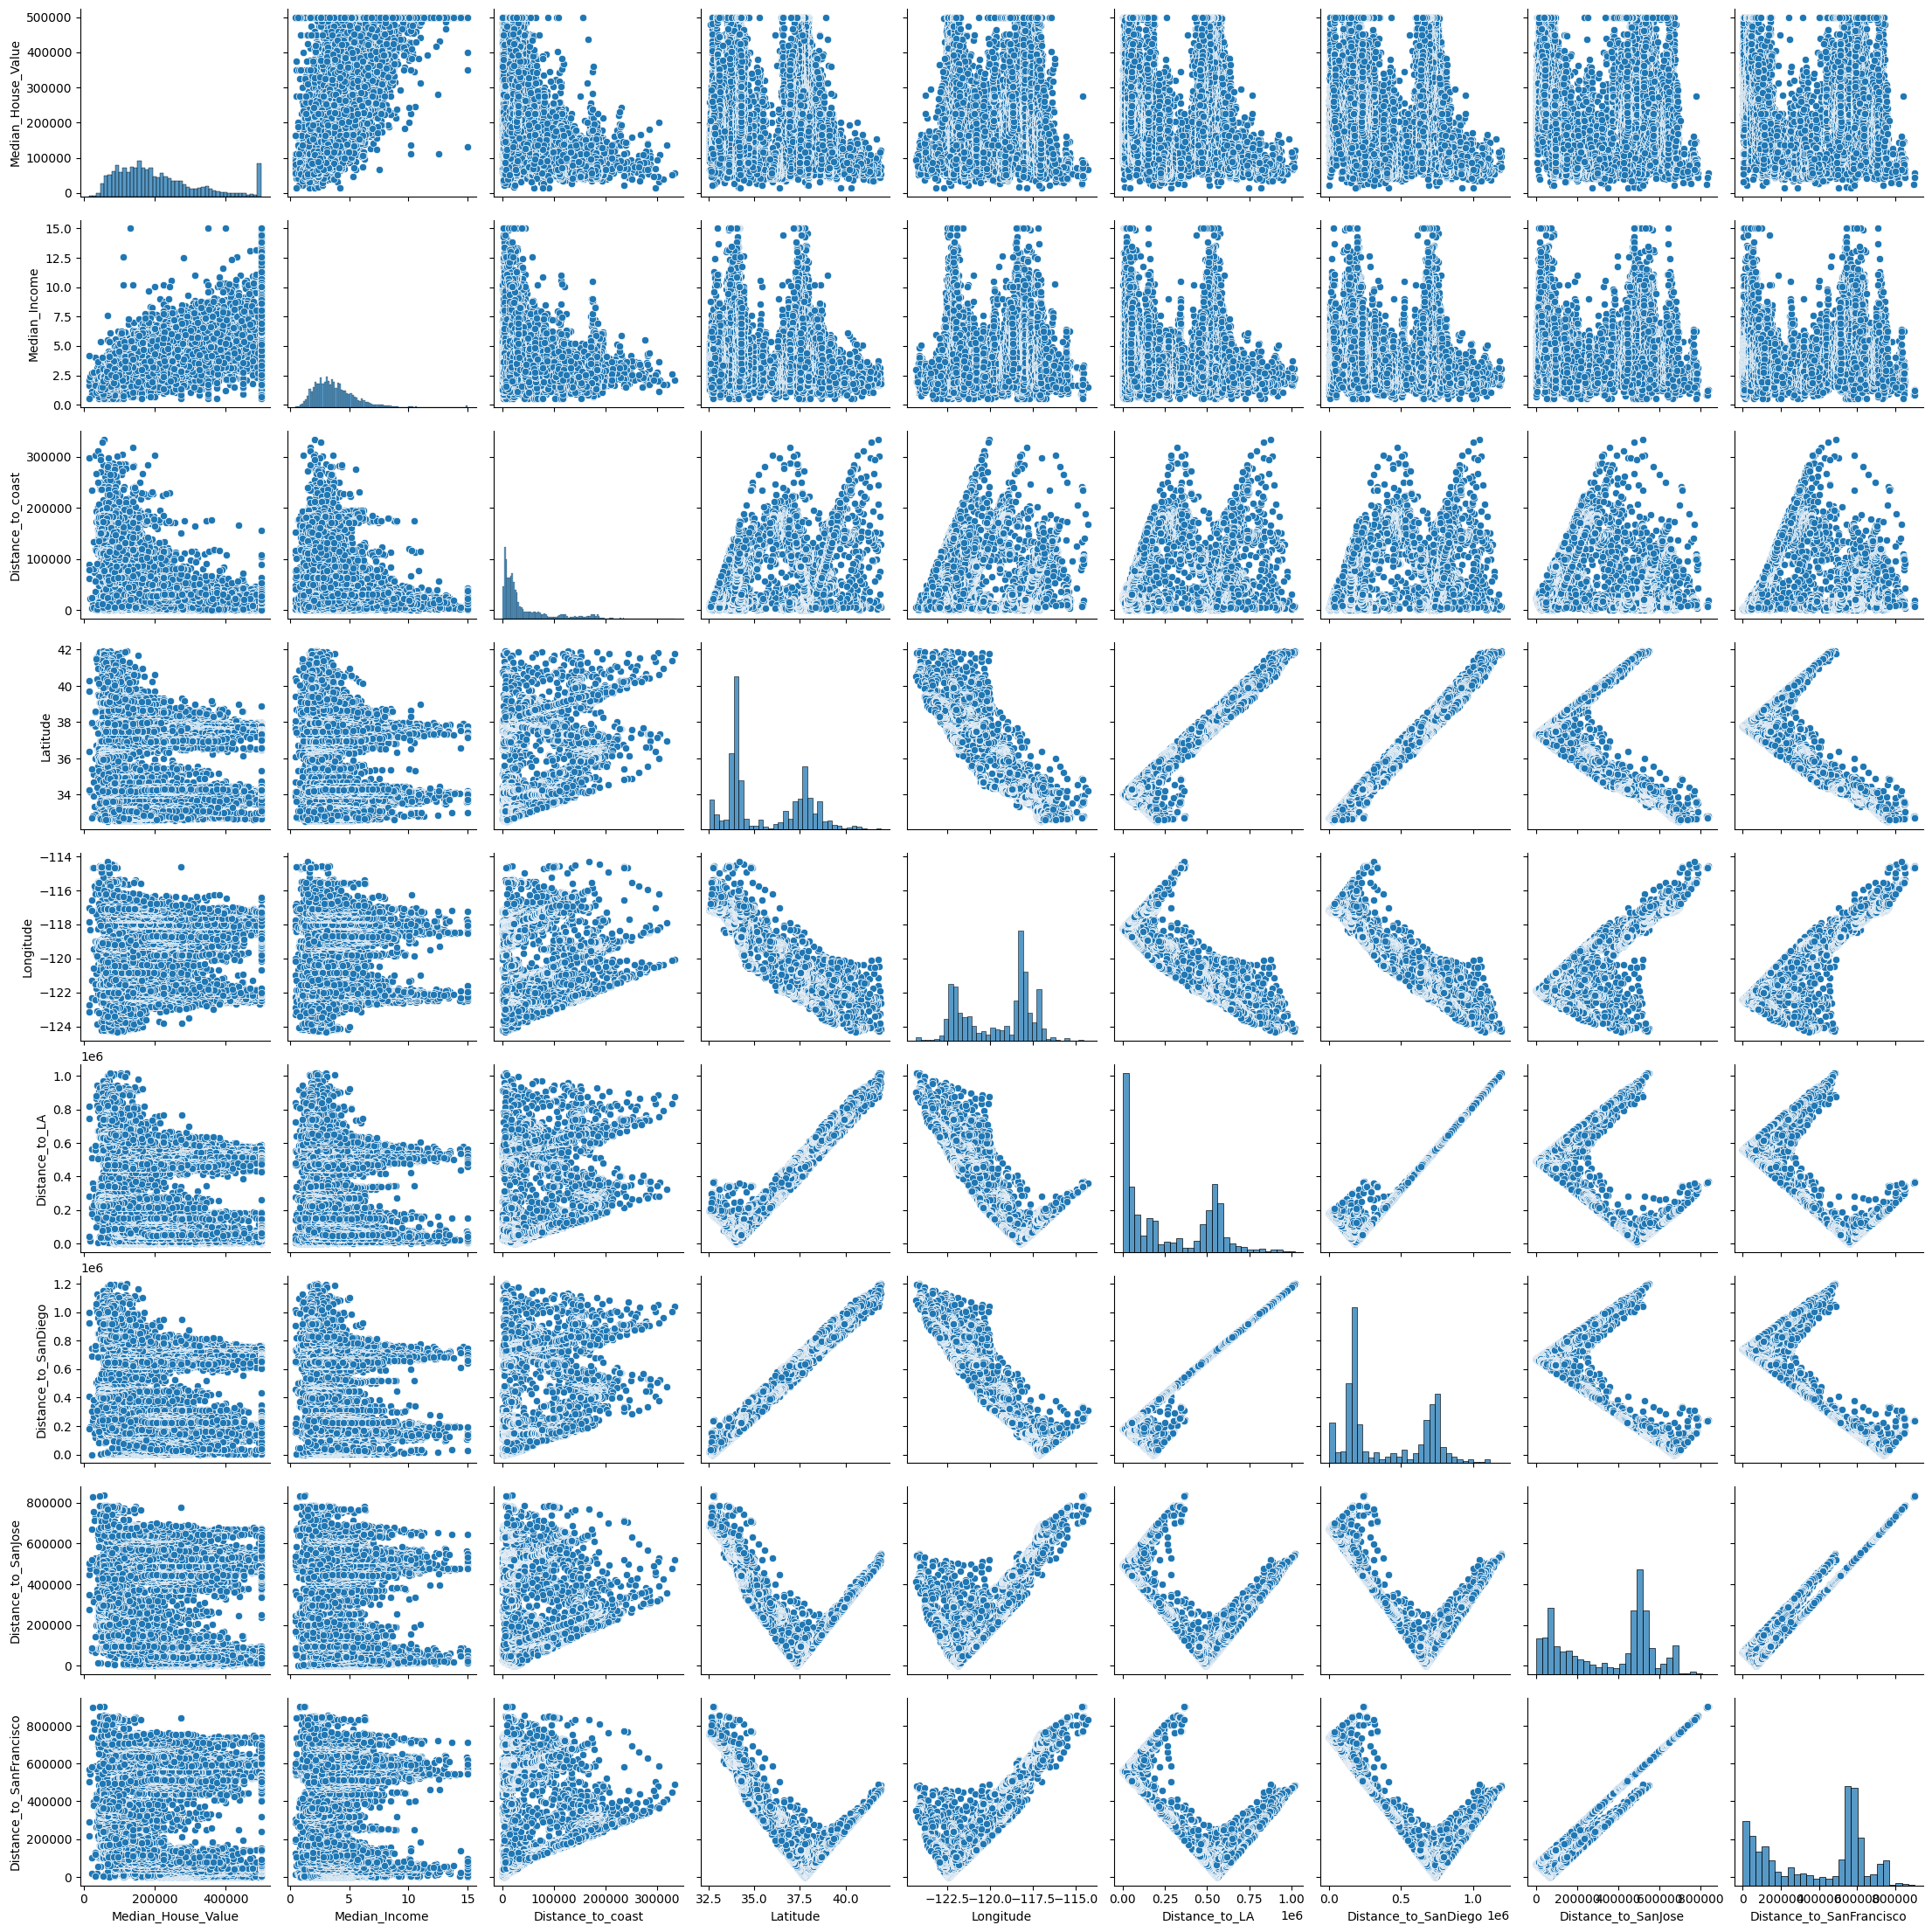

In [ ]:
# Scatter plot for chosen attributes that show significant correlations with Target variable House value, these attributes could become Predictor variables potentially.
g = sns.pairplot(subset_df)
plt.show()

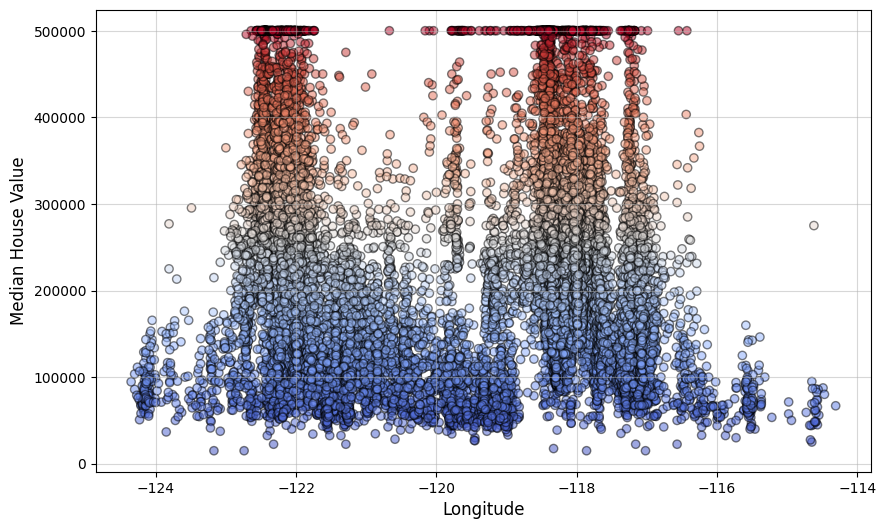

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Median_House_Value'], alpha=0.5, c=df['Median_House_Value'], cmap='coolwarm', edgecolor='k')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

## Identify Outliers

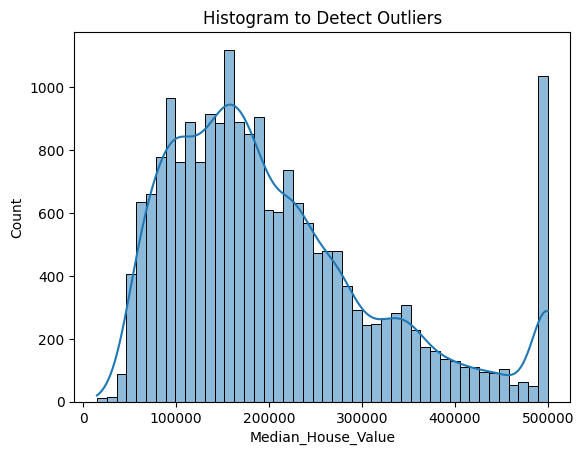

In [ ]:
sns.histplot(data=df['Median_House_Value'], kde=True)
plt.title('Histogram to Detect Outliers')
plt.show()

In [ ]:
# Check percentage of skewness
from scipy.stats import skew
skewness = abs(skew(df['Median_House_Value']))
print(f"Skewness: {skewness}")
if 0.5 < skewness < 1:
  print('Moderate skewness')
elif skewness > 1:
  print('High skewness')
else:
  print('Symmetric')

Skewness: 0.9776922140978416
Moderate skewness


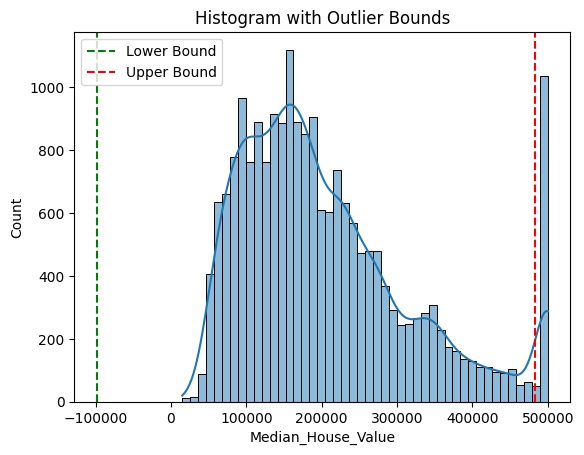

In [ ]:
# Identify outliers using the Interquartile Range (IQR)
Q1 = df['Median_House_Value'].quantile(0.25)
Q3 = df['Median_House_Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Highlight outliers
outliers = df[(df['Median_House_Value'] < lower_bound) | (df['Median_House_Value'] > upper_bound)]
sns.histplot(data=df['Median_House_Value'], kde=True)
plt.axvline(lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.legend()
plt.title('Histogram with Outlier Bounds')
plt.show()

In [ ]:
print(f'Upper bound outliers: {upper_bound}')
print(f'Lower bound outliers: {lower_bound}')

Upper bound outliers: 482412.5
Lower bound outliers: -98087.5


# Part 3: Build the Regression Model

## Model 1: Linear Regression

In [ ]:
# Try the first subset with outliers
subset_1 = subset_df[['Median_House_Value', 'Median_Income', 'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanFrancisco']]
# Split the dataset to predictor and target variables
X1 = subset_1.drop('Median_House_Value', axis=1)
y1 = subset_1['Median_House_Value']
# Split dataset to Train and Test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=1/3, random_state=0)
# Set up the model
model1 = LinearRegression()
# Fit the train set for training the model
model1.fit(X1_train, y1_train)
predictions_1 = model1.predict(X1_test)

In [ ]:
# Try the second subset excluding outliers in Median House Value
subset_2 = subset_1[subset_1['Median_House_Value'] <= upper_bound]
X2, y2 = subset_2.drop('Median_House_Value', axis=1), subset_2['Median_House_Value']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=1/3, random_state=0)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
predictions_2 = model2.predict(X2_test)

In [ ]:
subset_3 = subset_df[['Median_House_Value', 'Median_Income', 'Distance_to_coast', 'Longitude']]
subset_3 = subset_3[subset_3['Median_House_Value'] <= upper_bound]
X3, y3 = subset_3.drop('Median_House_Value', axis=1), subset_3['Median_House_Value']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=1/3, random_state=0)
model3 = LinearRegression()
model3.fit(X3_train, y3_train)
predictions_3 = model3.predict(X3_test)

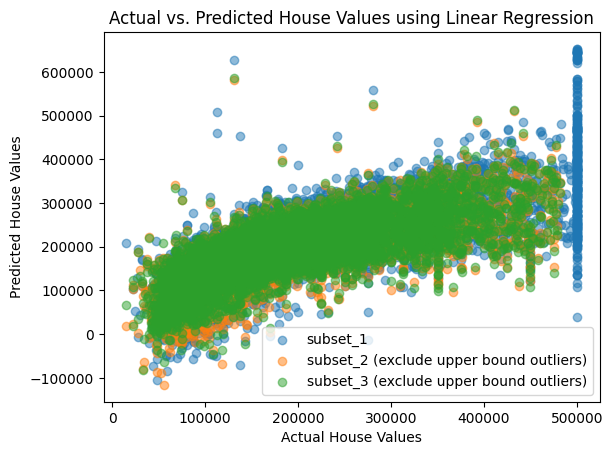

In [ ]:
# Plot the results of subset_1 and subset_2
plt.scatter(y1_test, predictions_1, label='subset_1', alpha=0.5)
plt.scatter(y2_test, predictions_2, label='subset_2 (exclude upper bound outliers)', alpha=0.5)
plt.scatter(y3_test, predictions_3, label='subset_3 (exclude upper bound outliers)', alpha=0.5)
plt.legend()
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Actual vs. Predicted House Values using Linear Regression')
plt.show()

# Part 4: Evaluate Model Accuracy

In [ ]:
print('Linear Regression subset_1')
print(f'MSE: {round(mean_squared_error(y1_test, predictions_1), 2)}')
print(f'MAE: {round(mean_absolute_error(y1_test, predictions_1), 2)}')
print(f'R2 score: {round(r2_score(y1_test, predictions_1), 2)}\n')

print('Linear Regression subset_2 (exclude upper bound outliers)')
print(f'MSE: {round(mean_squared_error(y2_test, predictions_2), 2)}')
print(f'MAE: {round(mean_absolute_error(y2_test, predictions_2), 2)}')
print(f'R2 score: {round(r2_score(y2_test, predictions_2), 2)}\n')

print('Linear Regression subset_3 (exclude upper bound outliers)')
print(f'MSE: {round(mean_squared_error(y3_test, predictions_3), 2)}')
print(f'MAE: {round(mean_absolute_error(y3_test, predictions_3), 2)}')
print(f'R2 score: {round(r2_score(y3_test, predictions_3), 2)}')


Linear Regression subset_1
MSE: 5646071544.62
MAE: 55236.18
R2 score: 0.57

Linear Regression subset_2 (exclude upper bound outliers)
MSE: 4022443607.49
MAE: 47666.8
R2 score: 0.56

Linear Regression subset_3 (exclude upper bound outliers)
MSE: 4187391533.47
MAE: 48474.45
R2 score: 0.54


In [ ]:
'''This code box is for running purpose, please ignore'''
import pandas as pd
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Correct file path
file_path = '/content/drive/My Drive/California_Houses.csv'
# Load the dataset
subset_df = pd.read_csv(file_path)
# Display the first few rows
print(subset_df.head())


In [ ]:
'''This code box is for running purpose, please ignore'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming `subset_df` is already loaded as the dataset
# Part 1: Define Upper Bound for Outliers
# Calculate the IQR for Median_House_Value
Q1 = subset_df['Median_House_Value'].quantile(0.25)  # 25th percentile
Q3 = subset_df['Median_House_Value'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define the upper bound as Q3 + 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Upper Bound for Outliers: {upper_bound}")

# Part 2: Build the Linear Regression Models
# Subset 1: Include all data (with outliers)
subset_1 = subset_df[['Median_House_Value', 'Median_Income', 'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanFrancisco']]
X1 = subset_1.drop('Median_House_Value', axis=1)
y1 = subset_1['Median_House_Value']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=1/3, random_state=0)

# Subset 2: Exclude upper bound outliers
subset_2 = subset_1[subset_1['Median_House_Value'] <= upper_bound]
X2 = subset_2.drop('Median_House_Value', axis=1)
y2 = subset_2['Median_House_Value']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=1/3, random_state=0)

# Subset 3: Exclude outliers, fewer predictors
subset_3 = subset_df[['Median_House_Value', 'Median_Income', 'Distance_to_coast', 'Longitude']]
subset_3 = subset_3[subset_3['Median_House_Value'] <= upper_bound]
X3 = subset_3.drop('Median_House_Value', axis=1)
y3 = subset_3['Median_House_Value']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=1/3, random_state=0)

# Train Models
model1 = LinearRegression().fit(X1_train, y1_train)
predictions_1 = model1.predict(X1_test)

model2 = LinearRegression().fit(X2_train, y2_train)
predictions_2 = model2.predict(X2_test)

model3 = LinearRegression().fit(X3_train, y3_train)
predictions_3 = model3.predict(X3_test)

# Part 3: Evaluate Models
print('subset_1 (with outliers)')
print(f'MSE: {round(mean_squared_error(y1_test, predictions_1), 2)}')
print(f'MAE: {round(mean_absolute_error(y1_test, predictions_1), 2)}')
print(f'R2 score: {round(r2_score(y1_test, predictions_1), 2)}\n')

print('subset_2 (exclude outliers)')
print(f'MSE: {round(mean_squared_error(y2_test, predictions_2), 2)}')
print(f'MAE: {round(mean_absolute_error(y2_test, predictions_2), 2)}')
print(f'R2 score: {round(r2_score(y2_test, predictions_2), 2)}\n')

print('subset_3 (exclude outliers, fewer predictors)')
print(f'MSE: {round(mean_squared_error(y3_test, predictions_3), 2)}')
print(f'MAE: {round(mean_absolute_error(y3_test, predictions_3), 2)}')
print(f'R2 score: {round(r2_score(y3_test, predictions_3), 2)}\n')

# Part 4: Plot Actual vs. Predicted
plt.scatter(y1_test, predictions_1, label='subset_1 (with outliers)', alpha=0.5)
plt.scatter(y2_test, predictions_2, label='subset_2 (exclude outliers)', alpha=0.5)



## Model 2: Ridge Regression, Lasso Regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso


# Ridge Regression for Subset 2
ridge = Ridge(alpha=1.0)
ridge.fit(X2_train, y2_train)
ridge_predictions = ridge.predict(X2_test)


# Lasso Regression for Subset 2
lasso = Lasso(alpha=0.1)
lasso.fit(X2_train, y2_train)
lasso_predictions = lasso.predict(X2_test)


# Evaluate Ridge
print('Ridge Evaluation subset_2:')
print(f'MSE: {mean_squared_error(y2_test, ridge_predictions):.2f}')
print(f'MAE: {mean_absolute_error(y2_test, ridge_predictions):.2f}')
print(f'R²: {r2_score(y2_test, ridge_predictions):.2f}\n')


# Evaluate Lasso
print('Lasso Evaluation subset_2:')
print(f'MSE: {mean_squared_error(y2_test, lasso_predictions):.2f}')
print(f'MAE: {mean_absolute_error(y2_test, lasso_predictions):.2f}')
print(f'R²: {r2_score(y2_test, lasso_predictions):.2f}')

Ridge Evaluation subset_2:
MSE: 4022445936.85
MAE: 47666.90
R²: 0.56

Lasso Evaluation subset_2:
MSE: 4022443698.33
MAE: 47666.81
R²: 0.56


In [ ]:
from sklearn.linear_model import Ridge, Lasso


# Ridge Regression for Subset 3
ridge = Ridge(alpha=1.0)
ridge.fit(X3_train, y3_train)
ridge_predictions = ridge.predict(X3_test)


# Lasso Regression for Subset 3
lasso = Lasso(alpha=0.1)
lasso.fit(X3_train, y3_train)
lasso_predictions = lasso.predict(X3_test)


# Evaluate Ridge
print('Ridge Evaluation subset_3:')
print(f'MSE: {mean_squared_error(y3_test, ridge_predictions):.2f}')
print(f'MAE: {mean_absolute_error(y3_test, ridge_predictions):.2f}')
print(f'R²: {r2_score(y3_test, ridge_predictions):.2f}\n')


# Evaluate Lasso
print('Lasso Evaluation subset_3:')
print(f'MSE: {mean_squared_error(y3_test, lasso_predictions):.2f}')
print(f'MAE: {mean_absolute_error(y3_test, lasso_predictions):.2f}')
print(f'R²: {r2_score(y3_test, lasso_predictions):.2f}')

Ridge Evaluation subset_3:
MSE: 4187393574.77
MAE: 48474.53
R²: 0.54

Lasso Evaluation subset_3:
MSE: 4187391509.06
MAE: 48474.45
R²: 0.54


# Part 5: Residual Visualization

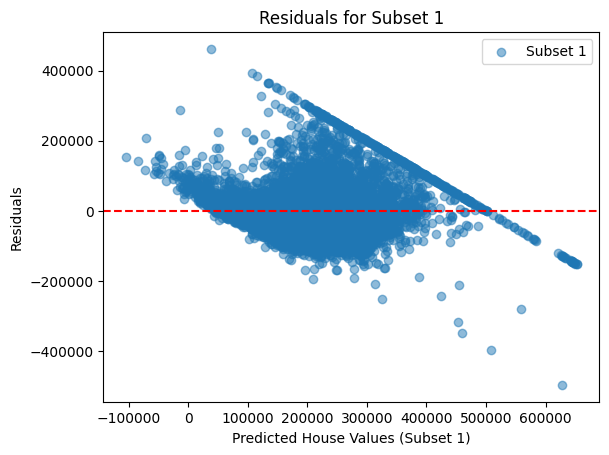

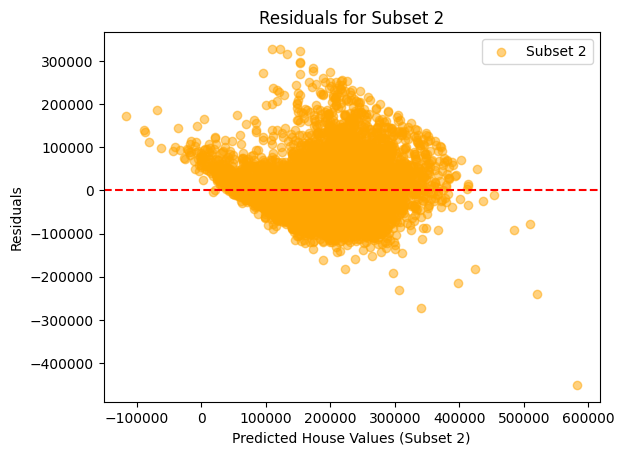

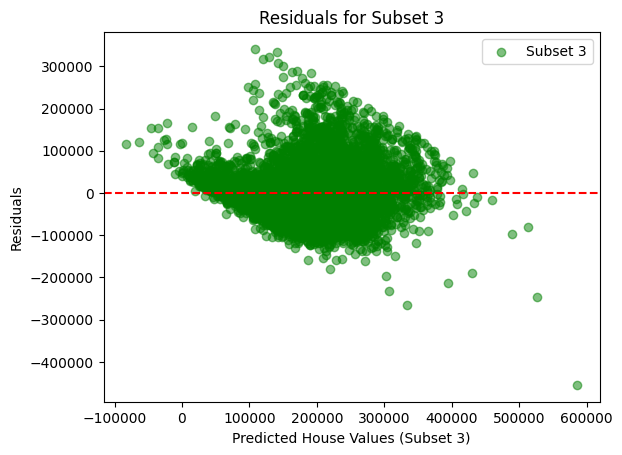

In [ ]:
import matplotlib.pyplot as plt

# Residuals for subset_1
residuals_1 = y1_test - predictions_1

# Residual plot for Subset 1
plt.scatter(predictions_1, residuals_1, alpha=0.5, label='Subset 1')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted House Values (Subset 1)')
plt.ylabel('Residuals')
plt.title('Residuals for Subset 1')
plt.legend()
plt.show()

# Residuals for subset_2
residuals_2 = y2_test - predictions_2

# Residual plot for Subset 2
plt.scatter(predictions_2, residuals_2, alpha=0.5, label='Subset 2', color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted House Values (Subset 2)')
plt.ylabel('Residuals')
plt.title('Residuals for Subset 2')
plt.legend()
plt.show()

# Residuals for subset_3
residuals_3 = y3_test - predictions_3

# Residual plot for Subset 3
plt.scatter(predictions_3, residuals_3, alpha=0.5, label='Subset 3', color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted House Values (Subset 3)')
plt.ylabel('Residuals')
plt.title('Residuals for Subset 3')
plt.legend()
plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


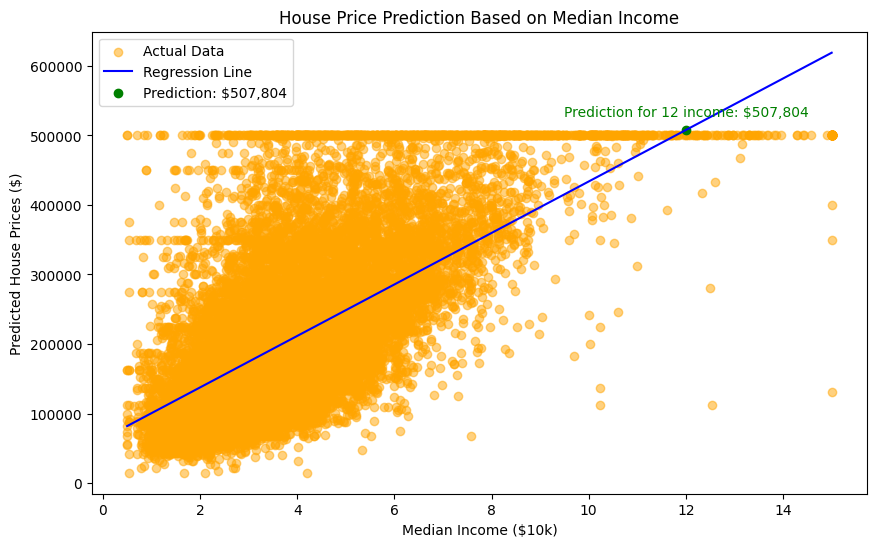

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/California_Houses.csv'
data = pd.read_csv(file_path)

# Extract the relevant features and target variable
X3 = data[['Median_Income', 'Distance_to_coast', 'Longitude']]
y3 = data['Median_House_Value']

# Train the model
model3 = LinearRegression()
model3.fit(X3, y3)

# Step 1: Generate data for the regression line
median_income_values = np.linspace(X3['Median_Income'].min(), X3['Median_Income'].max(), 100)

# Define constant values for other predictors based on the dataset
mean_distance_to_coast = X3['Distance_to_coast'].mean()
mean_longitude = X3['Longitude'].mean()

# Create future data for predictions
future_data = pd.DataFrame({
    'Median_Income': median_income_values,
    'Distance_to_coast': mean_distance_to_coast,
    'Longitude': mean_longitude
})

# Predict house prices for the generated Median Income values
predicted_prices = model3.predict(future_data)

# Step 2: Plot scatter plot of real data
plt.figure(figsize=(10, 6))
plt.scatter(X3['Median_Income'], y3, color='orange', label='Actual Data', alpha=0.5)

# Plot regression line
plt.plot(median_income_values, predicted_prices, color='blue', label='Regression Line')

# Step 3: Annotate a specific prediction
specific_income = 12  # Example: Predict for Median Income of 12
specific_data = pd.DataFrame({
    'Median_Income': [specific_income],
    'Distance_to_coast': [mean_distance_to_coast],
    'Longitude': [mean_longitude]
})
specific_price = model3.predict(specific_data)[0]

plt.scatter(specific_income, specific_price, color='green', label=f'Prediction: ${specific_price:,.0f}')
plt.annotate(f'Prediction for {specific_income} income: ${specific_price:,.0f}',
             (specific_income, specific_price),
             textcoords="offset points",
             xytext=(0, 10), ha='center', color='green')

# Step 4: Add labels and legend
plt.xlabel('Median Income ($10k)')
plt.ylabel('Predicted House Prices ($)')
plt.title('House Price Prediction Based on Median Income')
plt.legend()
plt.show()



# Part 6: Testing Attributes

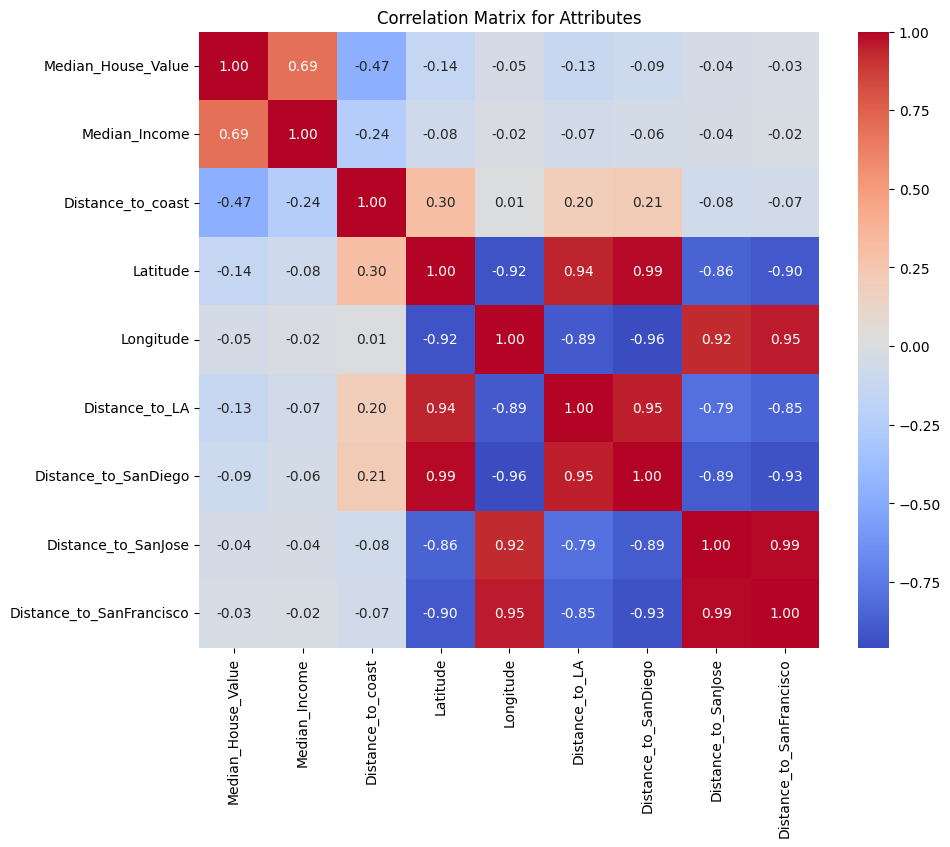

                  Predictor   F-Statistic       P-Value
0             Median_Income  18556.571631  0.000000e+00
1         Distance_to_coast   5830.810123  0.000000e+00
2                  Latitude    438.005453  2.939859e-96
4            Distance_to_LA    358.554364  2.733465e-79
5      Distance_to_SanDiego    178.147230  1.810649e-40
3                 Longitude     43.698976  3.923322e-11
6       Distance_to_SanJose     35.759612  2.269027e-09
7  Distance_to_SanFrancisco     19.290847  1.128016e-05


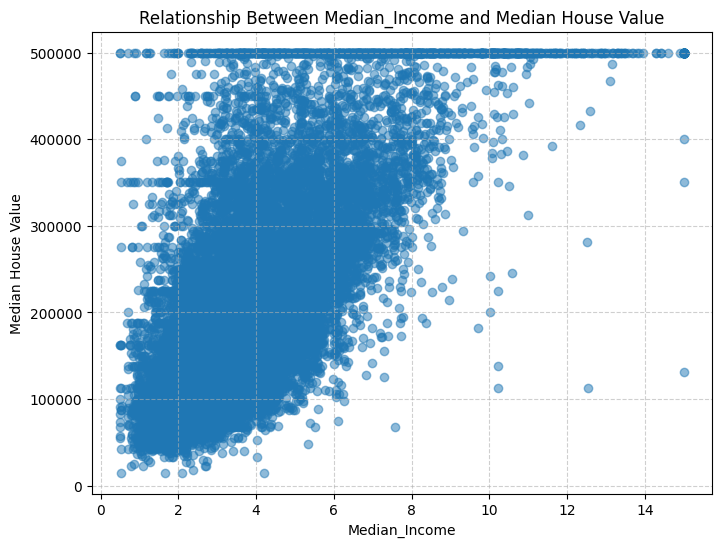

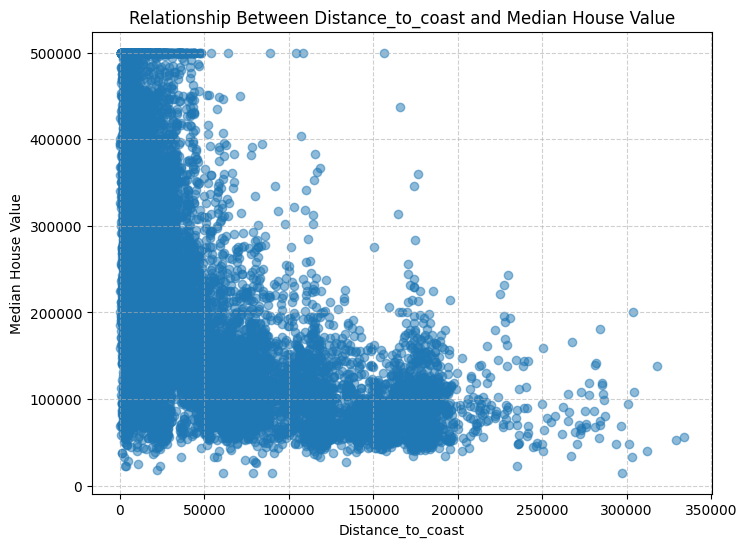

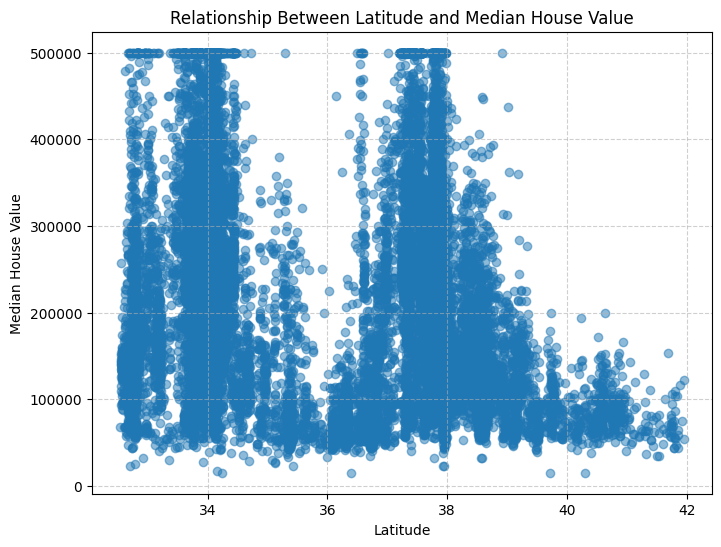

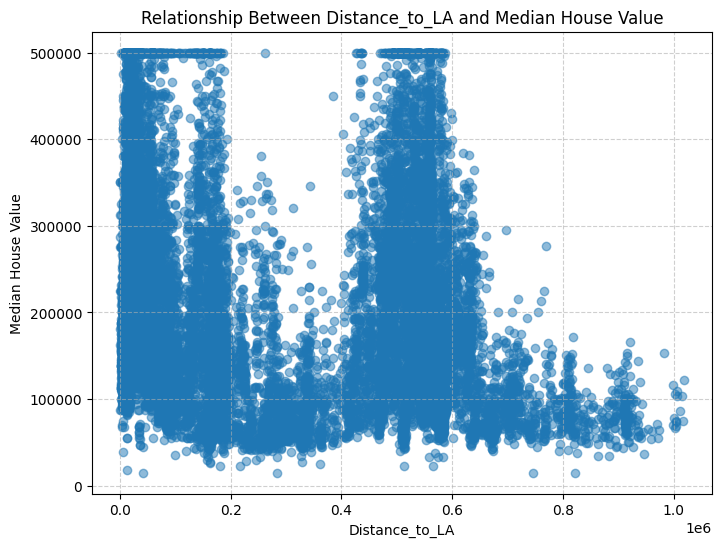

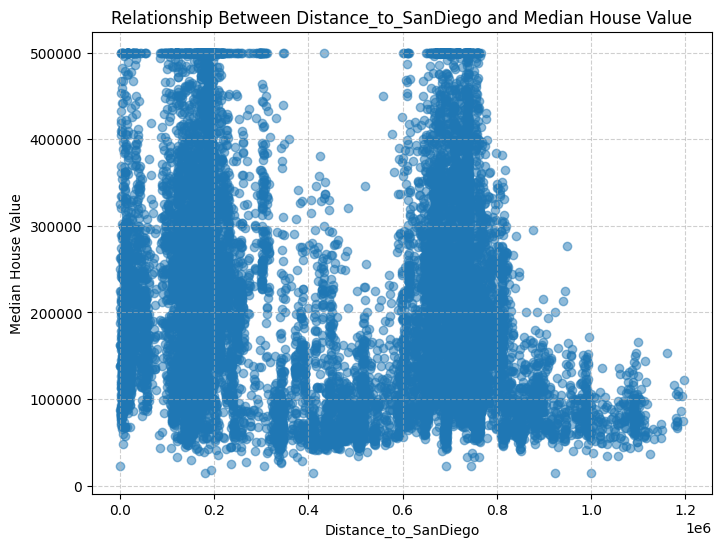

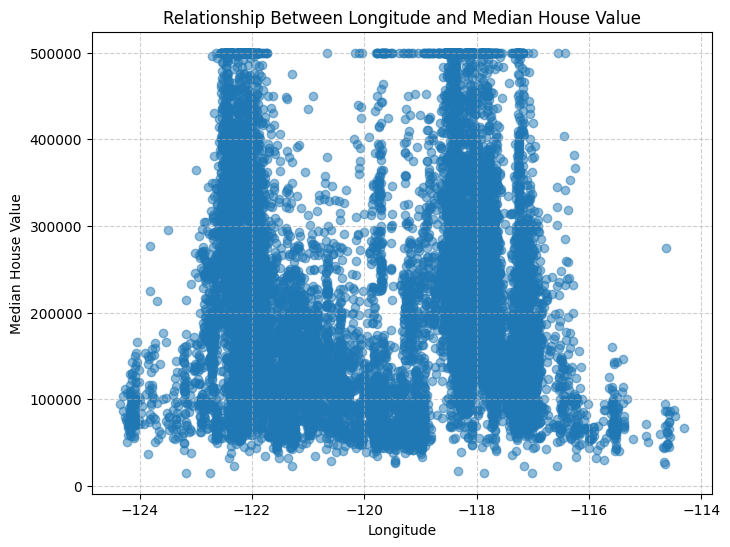

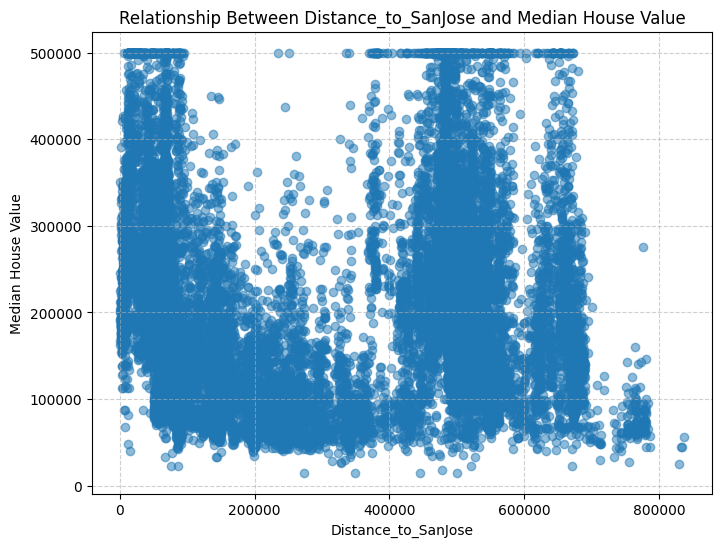

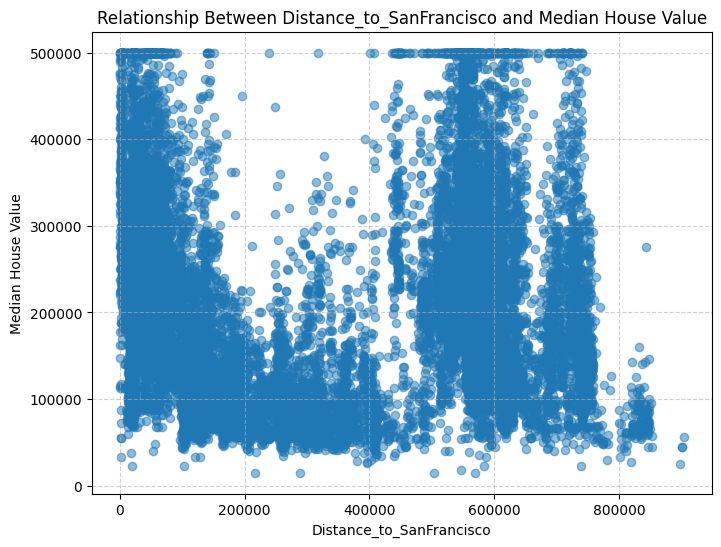

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression
import numpy as np

# Step 1: Correlation Analysis
# Calculate correlation matrix
correlation_matrix = subset_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Attributes')
plt.show()

# Step 2: F-statistic and p-values for Feature Importance
# Drop the target variable from predictors
X = subset_df.drop('Median_House_Value', axis=1)
y = subset_df['Median_House_Value']

# Calculate F-statistic and p-values
f_stats, p_values = f_regression(X, y)

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Predictor': X.columns,
    'F-Statistic': f_stats,
    'P-Value': p_values
}).sort_values(by='F-Statistic', ascending=False)

# Display importance
print(importance_df)

# Step 3: Scatterplots for Significant Attributes
# Select significant attributes (p-value < 0.05)
significant_attributes = importance_df[importance_df['P-Value'] < 0.05]['Predictor']

# Visualize relationships
for predictor in significant_attributes:
    plt.figure(figsize=(8, 6))
    plt.scatter(subset_df[predictor], y, alpha=0.5)
    plt.xlabel(predictor)
    plt.ylabel('Median House Value')
    plt.title(f'Relationship Between {predictor} and Median House Value')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


-------------------------------The End of Project-------------------------------